<a href="https://colab.research.google.com/github/Liza-IITP/Summer_Analytics_IITG-25/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# Load Data
train = pd.read_csv('/content/Train_Data.csv')
print(train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       1954 non-null   float64
 1   RIAGENDR   1948 non-null   float64
 2   PAQ605     1953 non-null   float64
 3   BMXBMI     1948 non-null   float64
 4   LBXGLU     1953 non-null   float64
 5   DIQ010     1948 non-null   float64
 6   LBXGLT     1955 non-null   float64
 7   LBXIN      1957 non-null   float64
 8   age_group  1952 non-null   object 
dtypes: float64(8), object(1)
memory usage: 138.4+ KB
None


In [17]:
!pip install ydata-profiling


In [18]:
from ydata_profiling import ProfileReport

report = ProfileReport(train, title="Pandas Profiling Report", explorative=True)
report.to_file(output_file="report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:00<00:00, 58.46it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Value Counts for Categorical Columns:

--- RIAGENDR ---
RIAGENDR
2.0    994
1.0    954
NaN     18
Name: count, dtype: int64


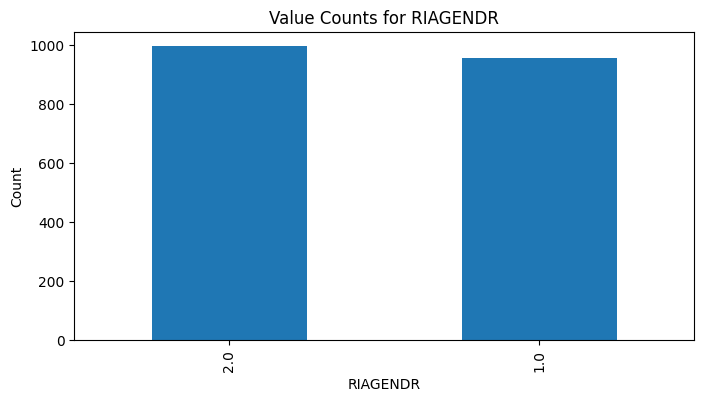


--- PAQ605 ---
PAQ605
2.0    1606
1.0     346
NaN      13
7.0       1
Name: count, dtype: int64


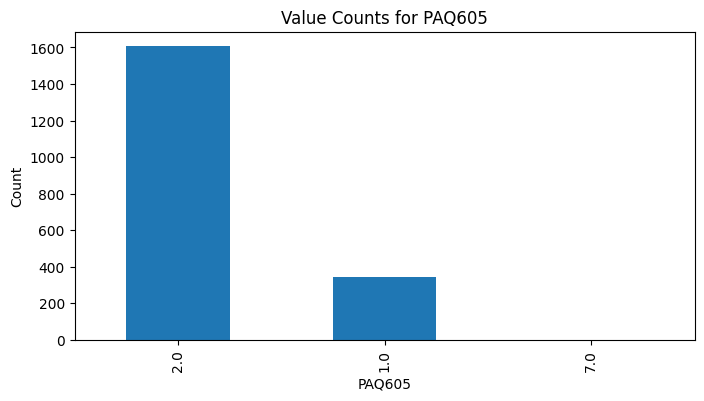


--- DIQ010 ---
DIQ010
2.0    1879
3.0      50
1.0      19
NaN      18
Name: count, dtype: int64


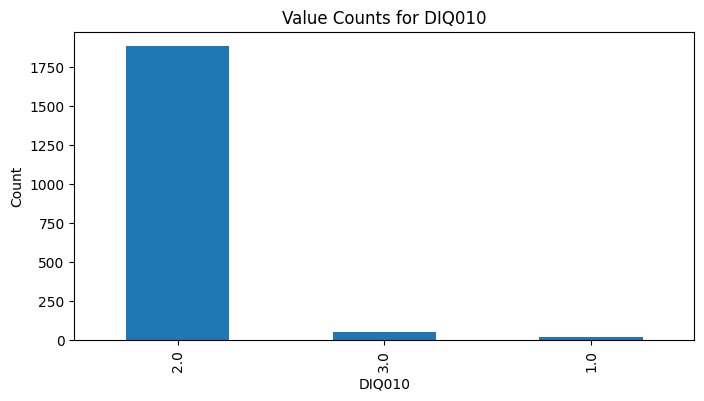


Age Group Distribution:
 age_group
Adult     1638
Senior     314
NaN         14
Name: count, dtype: int64


In [19]:
train.drop(columns=['SEQN'],inplace=True)

categorical_cols = ['RIAGENDR', 'PAQ605', 'DIQ010']
print("Value Counts for Categorical Columns:\n")
for col in categorical_cols:
    print(f"--- {col} ---")
    print(train[col].value_counts(dropna=False))
    train[col].value_counts().plot(kind='bar', figsize=(8, 4))
    plt.title(f'Value Counts for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
    print()

print("Age Group Distribution:\n", train['age_group'].value_counts(dropna=False))


In [20]:
print("Null values in each column:\n")
print(train.isnull().sum())

numeric_cols = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']
for col in numeric_cols:
    mean_val = train[col].mean()
    median_val = train[col].median()
    diff = abs(mean_val - median_val)
    print(f"{col}: Mean = {mean_val:.2f}, Median = {median_val:.2f}, Difference = {diff:.2f}")


Null values in each column:

RIAGENDR     18
PAQ605       13
BMXBMI       18
LBXGLU       13
DIQ010       18
LBXGLT       11
LBXIN         9
age_group    14
dtype: int64
BMXBMI: Mean = 27.97, Median = 26.80, Difference = 1.17
LBXGLU: Mean = 99.49, Median = 97.00, Difference = 2.49
LBXGLT: Mean = 115.15, Median = 105.00, Difference = 10.15
LBXIN: Mean = 11.86, Median = 9.03, Difference = 2.83


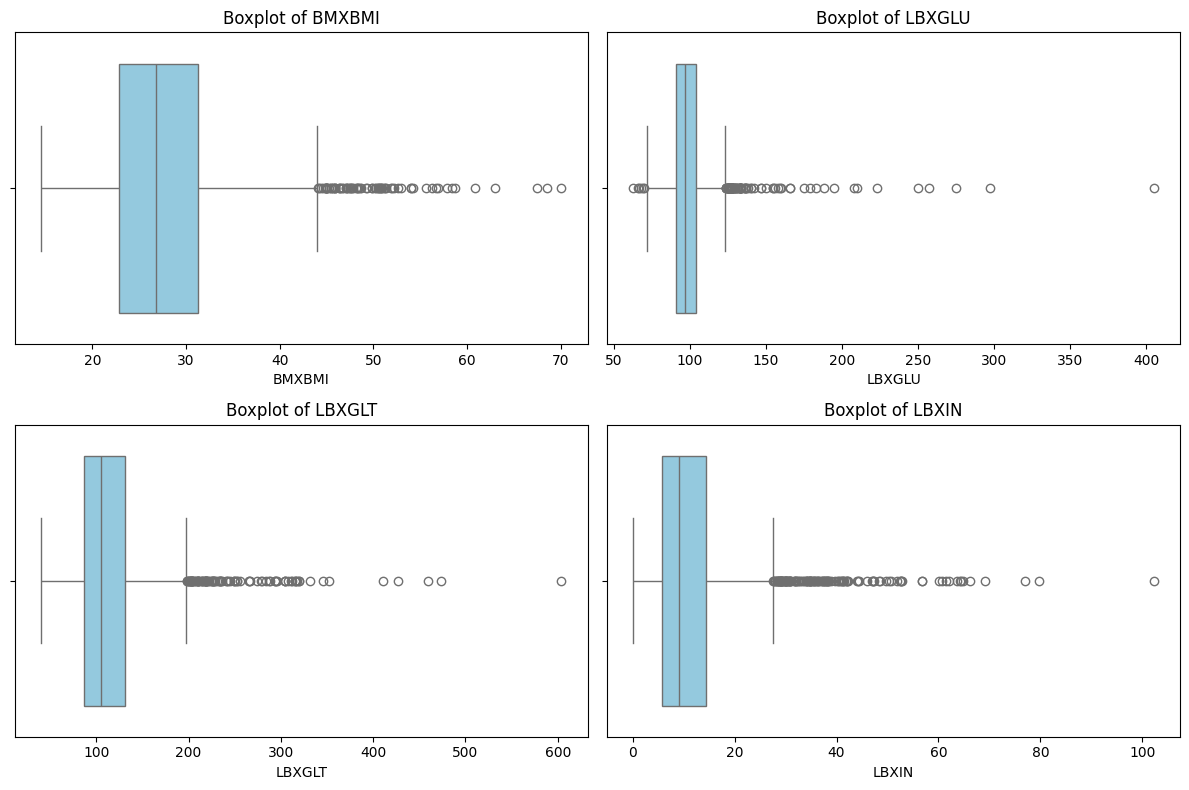

In [21]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=train[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()


In [22]:

print(f"Before: {train.shape}")
train = train[train['age_group'].notna()]
print(f"After dropping rows with missing age_group: {train.shape}")

for col in categorical_cols:
    train[col].fillna(train[col].mode()[0], inplace=True)

for col in numeric_cols:
    train[col].fillna(train[col].median(), inplace=True)

train.reset_index(drop=True, inplace=True)
train

Before: (1966, 8)
After dropping rows with missing age_group: (1952, 8)


,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,1.0,2.0,28.9,104.0,2.0,84.0,16.15,Adult
4,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult
...,...,...,...,...,...,...,...,...
1947,2.0,2.0,33.5,100.0,2.0,73.0,6.53,Adult
1948,1.0,2.0,30.0,93.0,2.0,208.0,13.02,Adult
1949,1.0,2.0,23.7,103.0,2.0,124.0,21.41,Adult
1950,2.0,2.0,27.4,90.0,2.0,108.0,4.99,Adult


In [23]:
from sklearn.preprocessing import RobustScaler

train['LBXGLU_log'] = np.log1p(train['LBXGLU'])
train['LBXGLT_log'] = np.log1p(train['LBXGLT'])
train['LBXIN_log'] = np.log1p(train['LBXIN'])

features_to_scale = ['BMXBMI', 'LBXGLU_log', 'LBXGLT_log', 'LBXIN_log']
scaler = RobustScaler()
scaled_features = scaler.fit_transform(train[features_to_scale])
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale)


In [24]:
!pip install xgboost lightgbm catboost imbalanced-learn


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, RocCurveDisplay
)

from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [33]:

numeric_cols = ['BMXBMI', 'LBXGLU_log', 'LBXGLT_log', 'LBXIN_log']


le = LabelEncoder()
train['age_group_encoded'] = le.fit_transform(train['age_group'])

X = train[categorical_cols + numeric_cols]
y = train['age_group_encoded']

X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', 'passthrough', categorical_cols)
])
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

from imblearn.combine import SMOTETomek

sm = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_processed, y_train)

y_train


,age_group_encoded
1807,0
1319,0
1132,0
1918,0
427,0
...,...
125,0
1645,0
1141,1
223,0


In [27]:
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "SVM": SVC(probability=True,class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Gradient Boost": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGB" : XGBClassifier(scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])),
    "LightGBM": LGBMClassifier(class_weight='balanced'),
    "CatBoost": CatBoostClassifier(class_weights=[1, 6])
}

def evaluate_model(name, model, X_train_res, y_train_res, X_test_proc, y_test):
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test_proc)

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_proc)[:, 1]
        roc = roc_auc_score(y_test, y_prob)
    else:
        y_prob = None
        roc = "N/A"

    print(f"\n{'='*20} {name} {'='*20}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("ROC AUC Score:", roc)

    if y_prob is not None:
        RocCurveDisplay.from_estimator(model, X_test_proc, y_test)
        plt.title(f"ROC Curve - {name}")
        plt.show()

    probs = model.predict_proba(X_test_processed)[:, 1]

    for t in [0.5, 0.45, 0.4, 0.35, 0.3]:
        preds = (probs >= t).astype(int)
        print(f"\nThreshold: {t}")
        print(confusion_matrix(y_test, preds))
        print(classification_report(y_test, preds))
        print("ROC AUC:", roc_auc_score(y_test, probs))


==================== Logistic Regression ====================
Accuracy: 0.6547314578005116
Confusion Matrix:
 [[227 101]
 [ 34  29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.69      0.77       328
           1       0.22      0.46      0.30        63

    accuracy                           0.65       391
   macro avg       0.55      0.58      0.54       391
weighted avg       0.77      0.65      0.70       391

ROC AUC Score: 0.6818137824235384


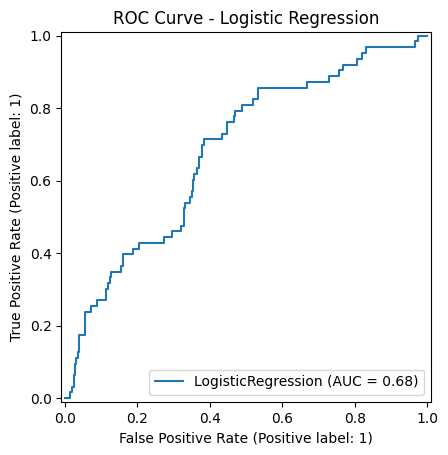


Threshold: 0.5
[[227 101]
 [ 34  29]]
              precision    recall  f1-score   support

           0       0.87      0.69      0.77       328
           1       0.22      0.46      0.30        63

    accuracy                           0.65       391
   macro avg       0.55      0.58      0.54       391
weighted avg       0.77      0.65      0.70       391

ROC AUC: 0.6818137824235384

Threshold: 0.45
[[207 121]
 [ 21  42]]
              precision    recall  f1-score   support

           0       0.91      0.63      0.74       328
           1       0.26      0.67      0.37        63

    accuracy                           0.64       391
   macro avg       0.58      0.65      0.56       391
weighted avg       0.80      0.64      0.68       391

ROC AUC: 0.6818137824235384

Threshold: 0.4
[[194 134]
 [ 18  45]]
              precision    recall  f1-score   support

           0       0.92      0.59      0.72       328
           1       0.25      0.71      0.37        63

    accu

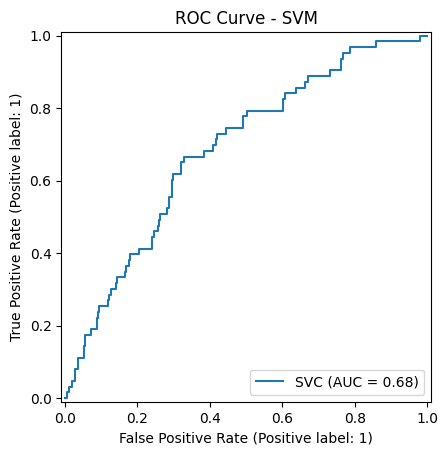


Threshold: 0.5
[[237  91]
 [ 31  32]]
              precision    recall  f1-score   support

           0       0.88      0.72      0.80       328
           1       0.26      0.51      0.34        63

    accuracy                           0.69       391
   macro avg       0.57      0.62      0.57       391
weighted avg       0.78      0.69      0.72       391

ROC AUC: 0.6847173828881146

Threshold: 0.45
[[228 100]
 [ 24  39]]
              precision    recall  f1-score   support

           0       0.90      0.70      0.79       328
           1       0.28      0.62      0.39        63

    accuracy                           0.68       391
   macro avg       0.59      0.66      0.59       391
weighted avg       0.80      0.68      0.72       391

ROC AUC: 0.6847173828881146

Threshold: 0.4
[[220 108]
 [ 21  42]]
              precision    recall  f1-score   support

           0       0.91      0.67      0.77       328
           1       0.28      0.67      0.39        63

    accu

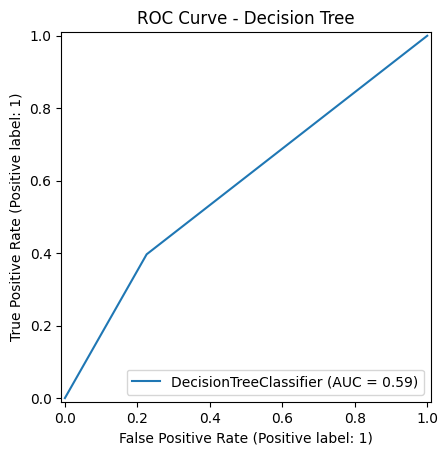


Threshold: 0.5
[[254  74]
 [ 38  25]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       328
           1       0.25      0.40      0.31        63

    accuracy                           0.71       391
   macro avg       0.56      0.59      0.56       391
weighted avg       0.77      0.71      0.74       391

ROC AUC: 0.5856078203639179

Threshold: 0.45
[[254  74]
 [ 38  25]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       328
           1       0.25      0.40      0.31        63

    accuracy                           0.71       391
   macro avg       0.56      0.59      0.56       391
weighted avg       0.77      0.71      0.74       391

ROC AUC: 0.5856078203639179

Threshold: 0.4
[[254  74]
 [ 38  25]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       328
           1       0.25      0.40      0.31        63

    accu

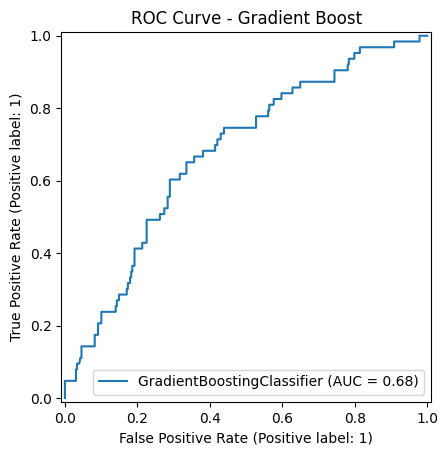


Threshold: 0.5
[[249  79]
 [ 32  31]]
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       328
           1       0.28      0.49      0.36        63

    accuracy                           0.72       391
   macro avg       0.58      0.63      0.59       391
weighted avg       0.79      0.72      0.74       391

ROC AUC: 0.6765147115756872

Threshold: 0.45
[[238  90]
 [ 30  33]]
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       328
           1       0.27      0.52      0.35        63

    accuracy                           0.69       391
   macro avg       0.58      0.62      0.58       391
weighted avg       0.79      0.69      0.73       391

ROC AUC: 0.6765147115756872

Threshold: 0.4
[[225 103]
 [ 25  38]]
              precision    recall  f1-score   support

           0       0.90      0.69      0.78       328
           1       0.27      0.60      0.37        63

    accu

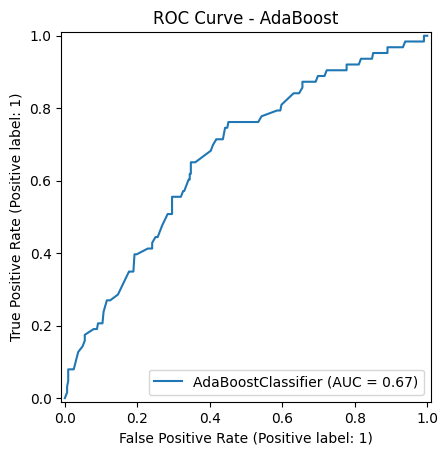


Threshold: 0.5
[[232  96]
 [ 31  32]]
              precision    recall  f1-score   support

           0       0.88      0.71      0.79       328
           1       0.25      0.51      0.34        63

    accuracy                           0.68       391
   macro avg       0.57      0.61      0.56       391
weighted avg       0.78      0.68      0.71       391

ROC AUC: 0.6709494773519163

Threshold: 0.45
[[172 156]
 [ 15  48]]
              precision    recall  f1-score   support

           0       0.92      0.52      0.67       328
           1       0.24      0.76      0.36        63

    accuracy                           0.56       391
   macro avg       0.58      0.64      0.51       391
weighted avg       0.81      0.56      0.62       391

ROC AUC: 0.6709494773519163

Threshold: 0.4
[[ 72 256]
 [  5  58]]
              precision    recall  f1-score   support

           0       0.94      0.22      0.36       328
           1       0.18      0.92      0.31        63

    accu

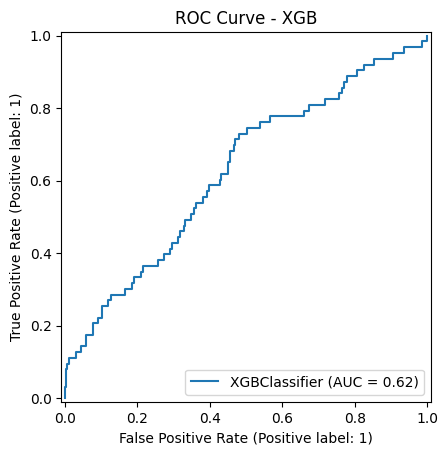


Threshold: 0.5
[[244  84]
 [ 39  24]]
              precision    recall  f1-score   support

           0       0.86      0.74      0.80       328
           1       0.22      0.38      0.28        63

    accuracy                           0.69       391
   macro avg       0.54      0.56      0.54       391
weighted avg       0.76      0.69      0.72       391

ROC AUC: 0.6245160665892373

Threshold: 0.45
[[234  94]
 [ 38  25]]
              precision    recall  f1-score   support

           0       0.86      0.71      0.78       328
           1       0.21      0.40      0.27        63

    accuracy                           0.66       391
   macro avg       0.54      0.56      0.53       391
weighted avg       0.76      0.66      0.70       391

ROC AUC: 0.6245160665892373

Threshold: 0.4
[[223 105]
 [ 34  29]]
              precision    recall  f1-score   support

           0       0.87      0.68      0.76       328
           1       0.22      0.46      0.29        63

    accu

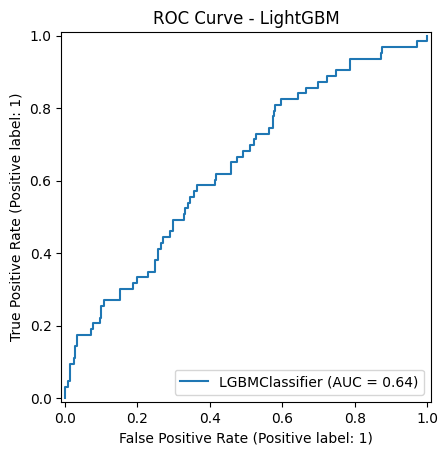


Threshold: 0.5
[[264  64]
 [ 43  20]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       328
           1       0.24      0.32      0.27        63

    accuracy                           0.73       391
   macro avg       0.55      0.56      0.55       391
weighted avg       0.76      0.73      0.74       391

ROC AUC: 0.6399051490514907

Threshold: 0.45
[[257  71]
 [ 42  21]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       328
           1       0.23      0.33      0.27        63

    accuracy                           0.71       391
   macro avg       0.54      0.56      0.55       391
weighted avg       0.76      0.71      0.73       391

ROC AUC: 0.6399051490514907

Threshold: 0.4
[[247  81]
 [ 41  22]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       328
           1       0.21      0.35      0.27        63

    accu

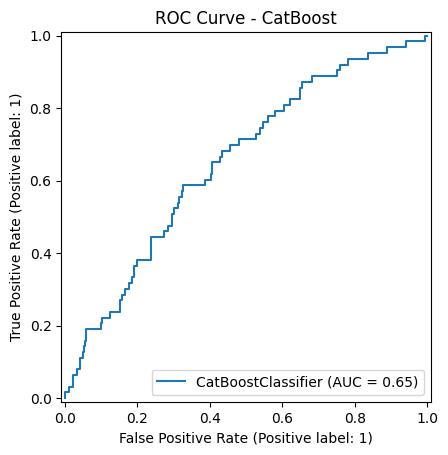


Threshold: 0.5
[[178 150]
 [ 19  44]]
              precision    recall  f1-score   support

           0       0.90      0.54      0.68       328
           1       0.23      0.70      0.34        63

    accuracy                           0.57       391
   macro avg       0.57      0.62      0.51       391
weighted avg       0.79      0.57      0.62       391

ROC AUC: 0.6509872241579557

Threshold: 0.45
[[166 162]
 [ 18  45]]
              precision    recall  f1-score   support

           0       0.90      0.51      0.65       328
           1       0.22      0.71      0.33        63

    accuracy                           0.54       391
   macro avg       0.56      0.61      0.49       391
weighted avg       0.79      0.54      0.60       391

ROC AUC: 0.6509872241579557

Threshold: 0.4
[[153 175]
 [ 17  46]]
              precision    recall  f1-score   support

           0       0.90      0.47      0.61       328
           1       0.21      0.73      0.32        63

    accu

In [28]:

for name, model in models.items():
    evaluate_model(name, model, X_train_resampled, y_train_resampled, X_test_processed, y_test)


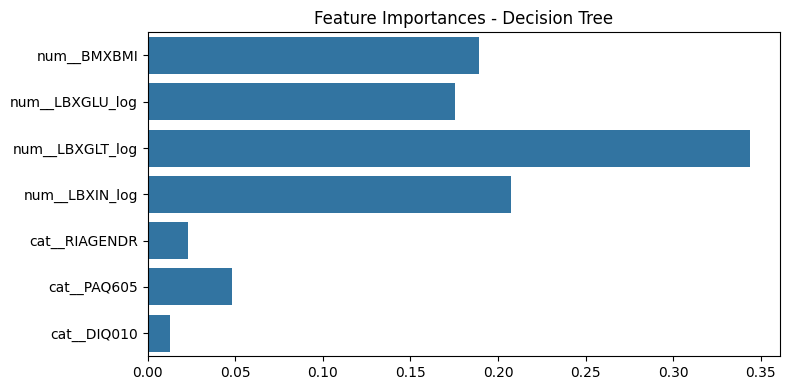

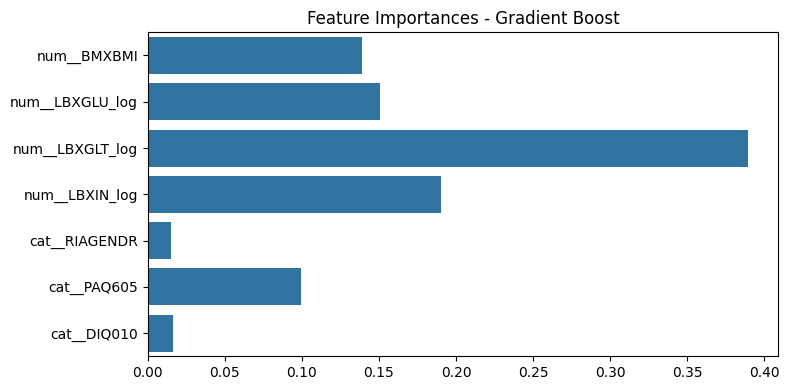

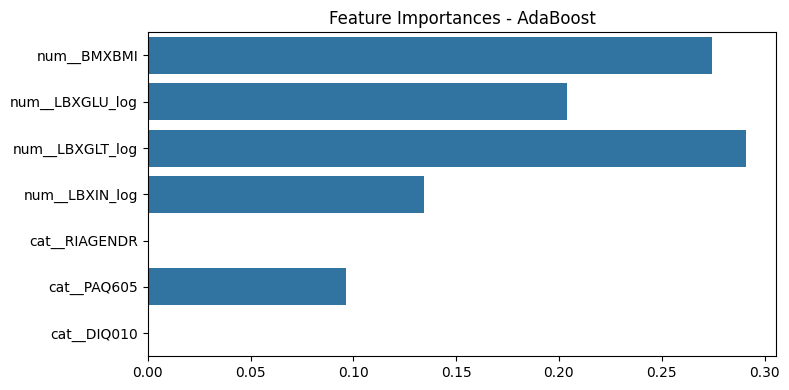

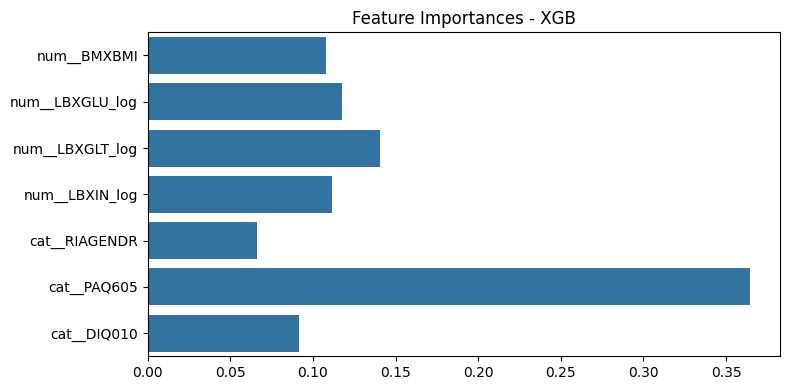

[LightGBM] [Info] Number of positive: 1285, number of negative: 1285
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1104
[LightGBM] [Info] Number of data points in the train set: 2570, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


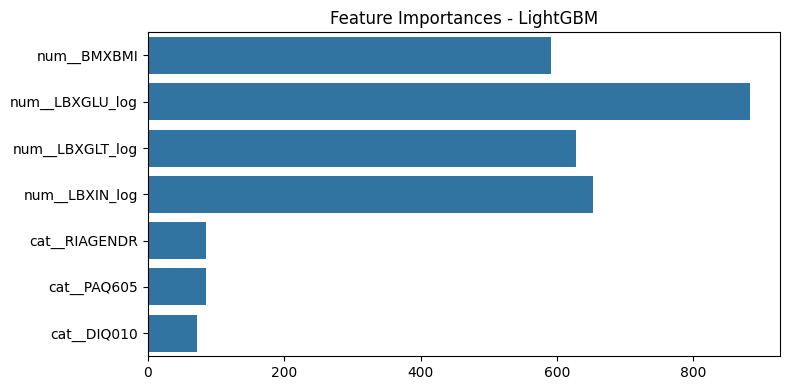

Learning rate set to 0.015416
0:	learn: 0.6804076	total: 1.91ms	remaining: 1.91s
1:	learn: 0.6681426	total: 3.51ms	remaining: 1.75s
2:	learn: 0.6554089	total: 5.16ms	remaining: 1.71s
3:	learn: 0.6452819	total: 6.77ms	remaining: 1.69s
4:	learn: 0.6338307	total: 8.31ms	remaining: 1.65s
5:	learn: 0.6225969	total: 9.87ms	remaining: 1.64s
6:	learn: 0.6125151	total: 11.4ms	remaining: 1.62s
7:	learn: 0.6031028	total: 13ms	remaining: 1.61s
8:	learn: 0.5929494	total: 15.9ms	remaining: 1.75s
9:	learn: 0.5829031	total: 18ms	remaining: 1.78s
10:	learn: 0.5740849	total: 19.7ms	remaining: 1.77s
11:	learn: 0.5659694	total: 21.2ms	remaining: 1.75s
12:	learn: 0.5572151	total: 22.8ms	remaining: 1.73s
13:	learn: 0.5501792	total: 24.3ms	remaining: 1.71s
14:	learn: 0.5423882	total: 25.9ms	remaining: 1.7s
15:	learn: 0.5344254	total: 27.5ms	remaining: 1.69s
16:	learn: 0.5272093	total: 29.1ms	remaining: 1.68s
17:	learn: 0.5201518	total: 30.6ms	remaining: 1.67s
18:	learn: 0.5137480	total: 32.2ms	remaining: 1.6

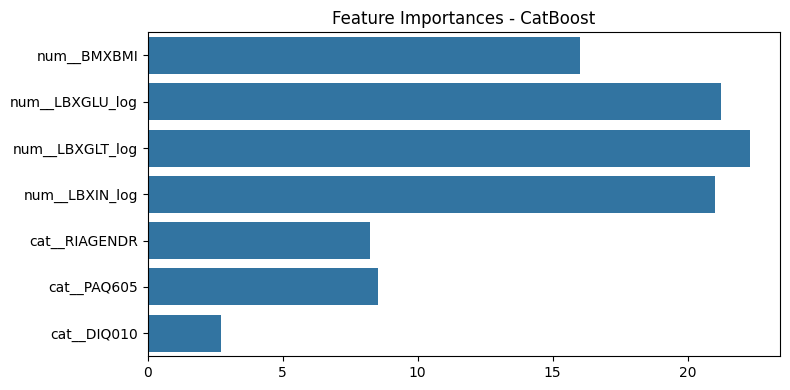

In [29]:
def plot_feature_importance(model, feature_names, model_name):
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        plt.figure(figsize=(8, 4))
        sns.barplot(x=importances, y=feature_names)
        plt.title(f"Feature Importances - {model_name}")
        plt.tight_layout()
        plt.show()
for name, model in models.items():
    if hasattr(model, "feature_importances_"):
        model.fit(X_train_resampled, y_train_resampled)
        plot_feature_importance(model, preprocessor.get_feature_names_out(), name)


In [34]:

def get_model_metrics(name, model, X_train_res, y_train_res, X_test_proc, y_test):
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test_proc)
    y_prob = model.predict_proba(X_test_proc)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob) if y_prob is not None else 0
    recall = cm[1,1] / (cm[1,1] + cm[1,0]) if (cm[1,1] + cm[1,0]) != 0 else 0

    print(f"\n{name}: Acc={acc:.4f}, ROC AUC={roc:.4f}, Recall={recall:.4f}")
    return {
        'name': name,
        'model': model,
        'accuracy': acc,
        'roc_auc': roc,
        'recall': recall
    }

model_scores = []
for name, model in models.items():
    result = get_model_metrics(name, model, X_train_resampled, y_train_resampled, X_test_processed, y_test)
    model_scores.append(result)

best_model_info = sorted(model_scores, key=lambda x: (x['roc_auc'], x['recall'], x['accuracy']), reverse=True)[0]
best_model = best_model_info['model']
print(f"\n✅ Best Model: {best_model_info['name']}")

test_df = pd.read_csv('/content/Test_Data.csv')
test_ids = test_df['SEQN']
test_df.drop(columns=['SEQN'], inplace=True)

for col in categorical_cols:
    test_df[col].fillna(train[col].mode()[0], inplace=True)
for col in numeric_cols:
    raw_col = col.replace('_log', '')
    test_df[raw_col].fillna(train[raw_col].median(), inplace=True)

test_df['LBXGLU_log'] = np.log1p(test_df['LBXGLU'])
test_df['LBXGLT_log'] = np.log1p(test_df['LBXGLT'])
test_df['LBXIN_log'] = np.log1p(test_df['LBXIN'])

X_final_test = test_df[categorical_cols + numeric_cols]
X_final_test_processed = preprocessor.transform(X_final_test)

final_preds = best_model.predict(X_final_test_processed)
final_labels = le.inverse_transform(final_preds)

submission = pd.DataFrame({
    'age_group': final_labels
})
submission.to_csv('submission.csv', index=False)
print("📁 submission.csv has been saved!")



Logistic Regression: Acc=0.6547, ROC AUC=0.6818, Recall=0.4603

SVM: Acc=0.6854, ROC AUC=0.6848, Recall=0.5556

Decision Tree: Acc=0.7110, ROC AUC=0.5648, Recall=0.3492

Gradient Boost: Acc=0.7161, ROC AUC=0.6763, Recall=0.4921

AdaBoost: Acc=0.6752, ROC AUC=0.6709, Recall=0.5079

XGB: Acc=0.6854, ROC AUC=0.6245, Recall=0.3810
[LightGBM] [Info] Number of positive: 1285, number of negative: 1285
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1104
[LightGBM] [Info] Number of data points in the train set: 2570, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

LightGBM: Acc=0.7263, ROC AUC=0.6399, Recall=0.3175
Learning rate set to 0.015416
0:	learn: 0.6804076	total: 1.81ms	remaining: 1.81s
1:	learn: 0.6681426	total: 3.36ms	rem